# Program 3:Simulate Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\petrol_consumption.csv')

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976.0,0.525,541
1,9.0,4092,1250.0,0.572,524
2,9.0,3865,1586.0,0.580,561
3,7.5,4870,2351.0,0.529,414
4,8.0,4399,431.0,0.544,410


In [4]:
df.shape

(48, 5)

In [5]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,44.000000,44.000000,48.000000
mean,7.668333,4241.833333,5666.386364,0.568318,576.770833
std,0.950770,573.623768,3620.595449,0.055725,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,2617.000000,0.529000,509.500000
50%,7.500000,4298.000000,5072.500000,0.563000,568.500000
75%,8.125000,4578.750000,7834.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  4
Population_Driver_licence(%)    4
Petrol_Consumption              0
dtype: int64

In [7]:
x=df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']].values
y=df['Petrol_Consumption'].values


In [8]:
from sklearn.impute import SimpleImputer
print(x[:,2:4])

[[1.9760e+03 5.2500e-01]
 [1.2500e+03 5.7200e-01]
 [1.5860e+03 5.8000e-01]
 [2.3510e+03 5.2900e-01]
 [4.3100e+02 5.4400e-01]
 [1.3330e+03 5.7100e-01]
 [1.1868e+04 4.5100e-01]
 [2.1380e+03 5.5300e-01]
 [8.5770e+03 5.2900e-01]
 [8.5070e+03 5.5200e-01]
 [5.9390e+03 5.3000e-01]
 [1.4186e+04 5.2500e-01]
 [6.9300e+03 5.7400e-01]
 [6.5800e+03 5.4500e-01]
 [8.1590e+03 6.0800e-01]
 [1.0340e+04 5.8600e-01]
 [8.5080e+03 5.7200e-01]
 [       nan 5.4000e-01]
 [       nan 7.2400e-01]
 [6.0100e+03 6.7700e-01]
 [7.8340e+03 6.6300e-01]
 [6.0200e+02 6.0200e-01]
 [2.4490e+03 5.1100e-01]
 [4.6860e+03 5.1700e-01]
 [2.6190e+03 5.5100e-01]
 [4.7460e+03 5.4400e-01]
 [5.3990e+03        nan]
 [9.0610e+03        nan]
 [5.9750e+03 5.6300e-01]
 [4.6500e+03 4.9300e-01]
 [6.9050e+03 5.1800e-01]
 [6.5940e+03 5.1300e-01]
 [6.5240e+03 5.7800e-01]
 [4.1210e+03 5.4700e-01]
 [3.4950e+03 4.8700e-01]
 [7.8340e+03 6.2900e-01]
 [1.7782e+04 5.6600e-01]
 [6.3850e+03 5.8600e-01]
 [       nan 6.6300e-01]
 [       nan 6.7200e-01]


In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 2:4])
x[:, 2:4] = imputer.transform(x[:, 2:4])
print(x[:,2:4])

[[1.97600000e+03 5.25000000e-01]
 [1.25000000e+03 5.72000000e-01]
 [1.58600000e+03 5.80000000e-01]
 [2.35100000e+03 5.29000000e-01]
 [4.31000000e+02 5.44000000e-01]
 [1.33300000e+03 5.71000000e-01]
 [1.18680000e+04 4.51000000e-01]
 [2.13800000e+03 5.53000000e-01]
 [8.57700000e+03 5.29000000e-01]
 [8.50700000e+03 5.52000000e-01]
 [5.93900000e+03 5.30000000e-01]
 [1.41860000e+04 5.25000000e-01]
 [6.93000000e+03 5.74000000e-01]
 [6.58000000e+03 5.45000000e-01]
 [8.15900000e+03 6.08000000e-01]
 [1.03400000e+04 5.86000000e-01]
 [8.50800000e+03 5.72000000e-01]
 [5.66638636e+03 5.40000000e-01]
 [5.66638636e+03 7.24000000e-01]
 [6.01000000e+03 6.77000000e-01]
 [7.83400000e+03 6.63000000e-01]
 [6.02000000e+02 6.02000000e-01]
 [2.44900000e+03 5.11000000e-01]
 [4.68600000e+03 5.17000000e-01]
 [2.61900000e+03 5.51000000e-01]
 [4.74600000e+03 5.44000000e-01]
 [5.39900000e+03 5.68318182e-01]
 [9.06100000e+03 5.68318182e-01]
 [5.97500000e+03 5.63000000e-01]
 [4.65000000e+03 4.93000000e-01]
 [6.905000

In [10]:
x.reshape(-1,1)

array([[9.00000000e+00],
       [3.57100000e+03],
       [1.97600000e+03],
       [5.25000000e-01],
       [9.00000000e+00],
       [4.09200000e+03],
       [1.25000000e+03],
       [5.72000000e-01],
       [9.00000000e+00],
       [3.86500000e+03],
       [1.58600000e+03],
       [5.80000000e-01],
       [7.50000000e+00],
       [4.87000000e+03],
       [2.35100000e+03],
       [5.29000000e-01],
       [8.00000000e+00],
       [4.39900000e+03],
       [4.31000000e+02],
       [5.44000000e-01],
       [1.00000000e+01],
       [5.34200000e+03],
       [1.33300000e+03],
       [5.71000000e-01],
       [8.00000000e+00],
       [5.31900000e+03],
       [1.18680000e+04],
       [4.51000000e-01],
       [8.00000000e+00],
       [5.12600000e+03],
       [2.13800000e+03],
       [5.53000000e-01],
       [8.00000000e+00],
       [4.44700000e+03],
       [8.57700000e+03],
       [5.29000000e-01],
       [7.00000000e+00],
       [4.51200000e+03],
       [8.50700000e+03],
       [5.52000000e-01],


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [12]:
corr_matrix=df.corr()
corr_matrix

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.537363,-0.238624,-0.451280
Average_income,0.012665,1.000000,0.031337,0.089887,-0.244862
Paved_Highways,-0.537363,0.031337,1.000000,0.011460,0.095759
Population_Driver_licence(%),-0.238624,0.089887,0.011460,1.000000,0.679831
Petrol_Consumption,-0.451280,-0.244862,0.095759,0.679831,1.000000


<AxesSubplot:>

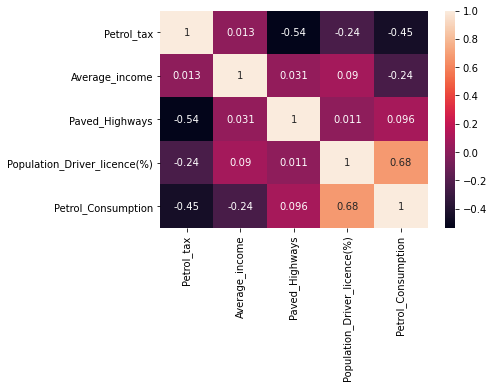

In [13]:
import seaborn as sns
sns.heatmap(corr_matrix,annot=True)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [15]:
regressor1=LinearRegression()
regressor1.fit(x_train,y_train)
y_pred_train=regressor1.predict(x_train)


In [16]:
y_pred=regressor1.predict(x_test)
np.set_printoptions(precision=2)

In [17]:
y_pred

array([485.39, 434.33, 564.04, 454.4 , 677.67, 568.55, 599.75, 698.3 ,
       590.4 , 643.34])

In [18]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7113219151217659

In [19]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 33.06572066010631
MSE 1670.1788146523602
RMSE 40.86782126138314


In [20]:
print("Actual:",y_test)
print("Predicted:",y_pred)

Actual: [464 457 571 534 640 561 603 648 631 704]
Predicted: [485.39 434.33 564.04 454.4  677.67 568.55 599.75 698.3  590.4  643.34]
